# Handle Outliers

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
dataset = pd.read_csv("D:\sandhya\Sandhya\Data-Science\csv\Social_Network_Ads_1.csv")

In [67]:
dataset

,User ID,Date,Country,Gender,Age,EstimatedSalary,Purchased
0,15624510,01-03-2012,France,Male,19,19000.0,0
1,15810944,01-04-2012,Italy,Male,35,20000.0,0
2,15668575,01-05-2012,France,Female,26,43000.0,0
3,15603246,01-06-2012,Germany,Female,27,57000.0,0
4,15804002,01-09-2012,France,Male,19,76000.0,0
...,...,...,...,...,...,...,...
398,15691863,08-05-2013,France,Female,46,41000.0,1
399,15706071,08-06-2013,Italy,Male,51,23000.0,1
400,15654296,08-07-2013,Italy,Female,50,20000.0,1
401,15755018,08-08-2013,Germany,Male,36,33000.0,0


In [68]:
dataset.shape

(403, 7)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          403 non-null    int64  
 1   Date             403 non-null    object 
 2   Country          403 non-null    object 
 3   Gender           403 non-null    object 
 4   Age              403 non-null    int64  
 5   EstimatedSalary  401 non-null    float64
 6   Purchased        403 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 22.2+ KB


# OHE Using Sklearn

In [4]:
#columnTrasfomer


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [6]:
#object of OHE

oh = OneHotEncoder()

In [7]:
#List of tuples

#remainder -- the operation for remaining columns
ct = ColumnTransformer(transformers = [("ohe", oh, ["Gender", "Country"])], remainder = "passthrough")

In [8]:
ct.fit_transform(dataset)

array([[0.0, 1.0, 1.0, ..., 19, 19000.0, 0],
       [0.0, 1.0, 0.0, ..., 35, 20000.0, 0],
       [1.0, 0.0, 1.0, ..., 26, 43000.0, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 50, 20000.0, 1],
       [0.0, 1.0, 0.0, ..., 36, 33000.0, 0],
       [1.0, 0.0, 0.0, ..., 49, 36000.0, 1]], dtype=object)

In [9]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['Gender', 'Country'])])

In [10]:
ct.get_feature_names()

['ohe__x0_Female',
 'ohe__x0_Male',
 'ohe__x1_France',
 'ohe__x1_Germany',
 'ohe__x1_Germany&',
 'ohe__x1_Italy',
 'ohe__x1_]Germany&',
 'ohe__x1_]Italy&',
 'User ID',
 'Date',
 'Age',
 'EstimatedSalary',
 'Purchased']

In [11]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(),
                                 ['Gender', 'Country'])])

In [12]:
dataset = ct.fit_transform(dataset)

In [13]:
dataset = pd.DataFrame(dataset, columns = ct.get_feature_names())

In [14]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary,Purchased
0,0,1,1,0,0,0,0,0,15624510,01-03-2012,19,19000,0
1,0,1,0,0,0,1,0,0,15810944,01-04-2012,35,20000,0
2,1,0,1,0,0,0,0,0,15668575,01-05-2012,26,43000,0
3,1,0,0,1,0,0,0,0,15603246,01-06-2012,27,57000,0
4,0,1,1,0,0,0,0,0,15804002,01-09-2012,19,76000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,0,1,0,0,0,0,0,15691863,08-05-2013,46,41000,1
399,0,1,0,0,0,1,0,0,15706071,08-06-2013,51,23000,1
400,1,0,0,0,0,1,0,0,15654296,08-07-2013,50,20000,1
401,0,1,0,1,0,0,0,0,15755018,08-08-2013,36,33000,0


# Split Dependent and Indepeendent variables

# 

In [15]:
dataset.drop("Purchased", axis=1)

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary
0,0,1,1,0,0,0,0,0,15624510,01-03-2012,19,19000
1,0,1,0,0,0,1,0,0,15810944,01-04-2012,35,20000
2,1,0,1,0,0,0,0,0,15668575,01-05-2012,26,43000
3,1,0,0,1,0,0,0,0,15603246,01-06-2012,27,57000
4,0,1,1,0,0,0,0,0,15804002,01-09-2012,19,76000
...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,0,1,0,0,0,0,0,15691863,08-05-2013,46,41000
399,0,1,0,0,0,1,0,0,15706071,08-06-2013,51,23000
400,1,0,0,0,0,1,0,0,15654296,08-07-2013,50,20000
401,0,1,0,1,0,0,0,0,15755018,08-08-2013,36,33000


In [16]:
x= dataset.drop("Purchased", axis=1)

In [17]:
x

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary
0,0,1,1,0,0,0,0,0,15624510,01-03-2012,19,19000
1,0,1,0,0,0,1,0,0,15810944,01-04-2012,35,20000
2,1,0,1,0,0,0,0,0,15668575,01-05-2012,26,43000
3,1,0,0,1,0,0,0,0,15603246,01-06-2012,27,57000
4,0,1,1,0,0,0,0,0,15804002,01-09-2012,19,76000
...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,0,1,0,0,0,0,0,15691863,08-05-2013,46,41000
399,0,1,0,0,0,1,0,0,15706071,08-06-2013,51,23000
400,1,0,0,0,0,1,0,0,15654296,08-07-2013,50,20000
401,0,1,0,1,0,0,0,0,15755018,08-08-2013,36,33000


In [18]:
y = dataset["Purchased"]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
398    1
399    1
400    1
401    0
402    1
Name: Purchased, Length: 403, dtype: object

# Split Dataset into  Train and Test

In [20]:
dataset

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary,Purchased
0,0,1,1,0,0,0,0,0,15624510,01-03-2012,19,19000,0
1,0,1,0,0,0,1,0,0,15810944,01-04-2012,35,20000,0
2,1,0,1,0,0,0,0,0,15668575,01-05-2012,26,43000,0
3,1,0,0,1,0,0,0,0,15603246,01-06-2012,27,57000,0
4,0,1,1,0,0,0,0,0,15804002,01-09-2012,19,76000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1,0,1,0,0,0,0,0,15691863,08-05-2013,46,41000,1
399,0,1,0,0,0,1,0,0,15706071,08-06-2013,51,23000,1
400,1,0,0,0,0,1,0,0,15654296,08-07-2013,50,20000,1
401,0,1,0,1,0,0,0,0,15755018,08-08-2013,36,33000,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
 #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
y_train, y_test = train_test_split(y, test_size=0.33, random_state=42)
y_test

70     0
281    1
283    1
33     0
42     0
      ..
323    1
148    0
247    1
157    0
165    0
Name: Purchased, Length: 133, dtype: object

In [24]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [63]:
x_train

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Age,EstimatedSalary
253,0,1,1,0,0,0,0,0,15723373,37,52000
379,1,0,1,0,0,0,0,0,15596984,46,74000
119,0,1,0,0,0,1,0,0,15701962,41,59000
196,0,1,0,1,0,0,0,0,15689751,28,89000
219,0,1,0,0,0,1,0,0,15582066,40,78000
...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,0,0,0,15726358,24,27000
106,1,0,0,1,0,0,0,0,15706185,26,35000
270,1,0,0,0,0,1,0,0,15746203,47,144000
348,1,0,0,0,0,1,0,0,15716781,41,63000


In [26]:
x_test

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary
70,0,1,0,1,0,0,0,0,15756932,4/13/2012,25,80000
281,1,0,0,0,0,1,0,0,15613334,2/15/2013,54,233000
283,1,0,0,0,0,1,0,0,15609669,2/20/2013,59,88000
33,1,0,1,0,0,0,0,0,15776733,2/21/2012,28,44000
42,0,1,1,0,0,0,0,0,15772798,03-05-2012,35,108000
...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,0,0,0,1,0,0,15774872,4/18/2013,52,138000
148,0,1,0,1,0,0,0,0,15779862,08-03-2012,29,61000
247,1,0,0,1,0,0,0,0,15722061,12/27/2012,51,146000
157,0,1,0,0,0,1,0,0,15602373,8/16/2012,29,75000


In [27]:
x_train = x_train.drop("Date", axis = 1)

In [28]:
x_train

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Age,EstimatedSalary
253,0,1,1,0,0,0,0,0,15723373,37,52000
379,1,0,1,0,0,0,0,0,15596984,46,74000
119,0,1,0,0,0,1,0,0,15701962,41,59000
196,0,1,0,1,0,0,0,0,15689751,28,89000
219,0,1,0,0,0,1,0,0,15582066,40,78000
...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,0,0,0,15726358,24,27000
106,1,0,0,1,0,0,0,0,15706185,26,35000
270,1,0,0,0,0,1,0,0,15746203,47,144000
348,1,0,0,0,0,1,0,0,15716781,41,63000


In [29]:
y_train

253    0
379    0
119    0
196    0
219    0
      ..
71     0
106    0
270    1
348    0
102    0
Name: Purchased, Length: 270, dtype: object

In [30]:
y_test

70     0
281    1
283    1
33     0
42     0
      ..
323    1
148    0
247    1
157    0
165    0
Name: Purchased, Length: 133, dtype: object

Features Scaling

In [31]:
 x_train

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Age,EstimatedSalary
253,0,1,1,0,0,0,0,0,15723373,37,52000
379,1,0,1,0,0,0,0,0,15596984,46,74000
119,0,1,0,0,0,1,0,0,15701962,41,59000
196,0,1,0,1,0,0,0,0,15689751,28,89000
219,0,1,0,0,0,1,0,0,15582066,40,78000
...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,1,0,0,0,0,0,15726358,24,27000
106,1,0,0,1,0,0,0,0,15706185,26,35000
270,1,0,0,0,0,1,0,0,15746203,47,144000
348,1,0,0,0,0,1,0,0,15716781,41,63000


# Feature Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
#reate Object of MinMaxScaler
sc = MinMaxScaler()

In [34]:
x_train_scaled = sc.fit_transform(x_train)

In [35]:
x_train_scaled

array([[0.        , 1.        , 1.        , ..., 0.62595737, 0.45238095,
        0.00742227],
       [1.        , 0.        , 1.        , ..., 0.1113337 , 0.66666667,
        0.01183551],
       [0.        , 1.        , 0.        , ..., 0.53877726, 0.54761905,
        0.00882648],
       ...,
       [1.        , 0.        , 0.        , ..., 0.71891529, 0.69047619,
        0.02587763],
       [1.        , 0.        , 0.        , ..., 0.59911643, 0.54761905,
        0.00962889],
       [1.        , 0.        , 0.        , ..., 0.06068527, 0.33333333,
        0.01424273]])

In [36]:
pd.DataFrame(sc.fit_transform(x_train))

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.625957,0.452381,0.007422
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.111334,0.666667,0.011836
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.538777,0.547619,0.008826
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.489057,0.238095,0.014845
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.050591,0.523810,0.012638
...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.638112,0.142857,0.002407
266,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.555972,0.190476,0.004012
267,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.718915,0.690476,0.025878
268,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.599116,0.547619,0.009629


In [37]:
x_test

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Date,Age,EstimatedSalary
70,0,1,0,1,0,0,0,0,15756932,4/13/2012,25,80000
281,1,0,0,0,0,1,0,0,15613334,2/15/2013,54,233000
283,1,0,0,0,0,1,0,0,15609669,2/20/2013,59,88000
33,1,0,1,0,0,0,0,0,15776733,2/21/2012,28,44000
42,0,1,1,0,0,0,0,0,15772798,03-05-2012,35,108000
...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,0,0,0,1,0,0,15774872,4/18/2013,52,138000
148,0,1,0,1,0,0,0,0,15779862,08-03-2012,29,61000
247,1,0,0,1,0,0,0,0,15722061,12/27/2012,51,146000
157,0,1,0,0,0,1,0,0,15602373,8/16/2012,29,75000


In [38]:
x_test = x_test.drop("Date", axis = 1)

In [39]:
x_test

,ohe__x0_Female,ohe__x0_Male,ohe__x1_France,ohe__x1_Germany,ohe__x1_Germany&,ohe__x1_Italy,ohe__x1_]Germany&,ohe__x1_]Italy&,User ID,Age,EstimatedSalary
70,0,1,0,1,0,0,0,0,15756932,25,80000
281,1,0,0,0,0,1,0,0,15613334,54,233000
283,1,0,0,0,0,1,0,0,15609669,59,88000
33,1,0,1,0,0,0,0,0,15776733,28,44000
42,0,1,1,0,0,0,0,0,15772798,35,108000
...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,0,0,0,1,0,0,15774872,52,138000
148,0,1,0,1,0,0,0,0,15779862,29,61000
247,1,0,0,1,0,0,0,0,15722061,51,146000
157,0,1,0,0,0,1,0,0,15602373,29,75000


In [40]:
x_test_scaled = sc.fit_transform(x_test)

(array([[133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 133.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [133.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.0, 1581455.3, 3162910.6, 4744365.9, 6325821.2, 7907276.5,
        9488731.8, 11070187.1, 12651642.4, 14233097.700000001, 15814553.0],
       dtype=object),
 <a list of 11 BarContainer objects>)

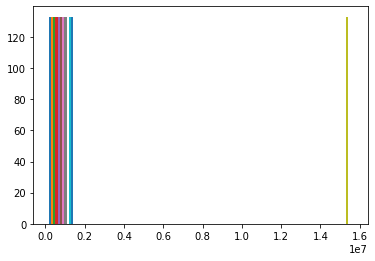

In [41]:
plt.hist(x_test)

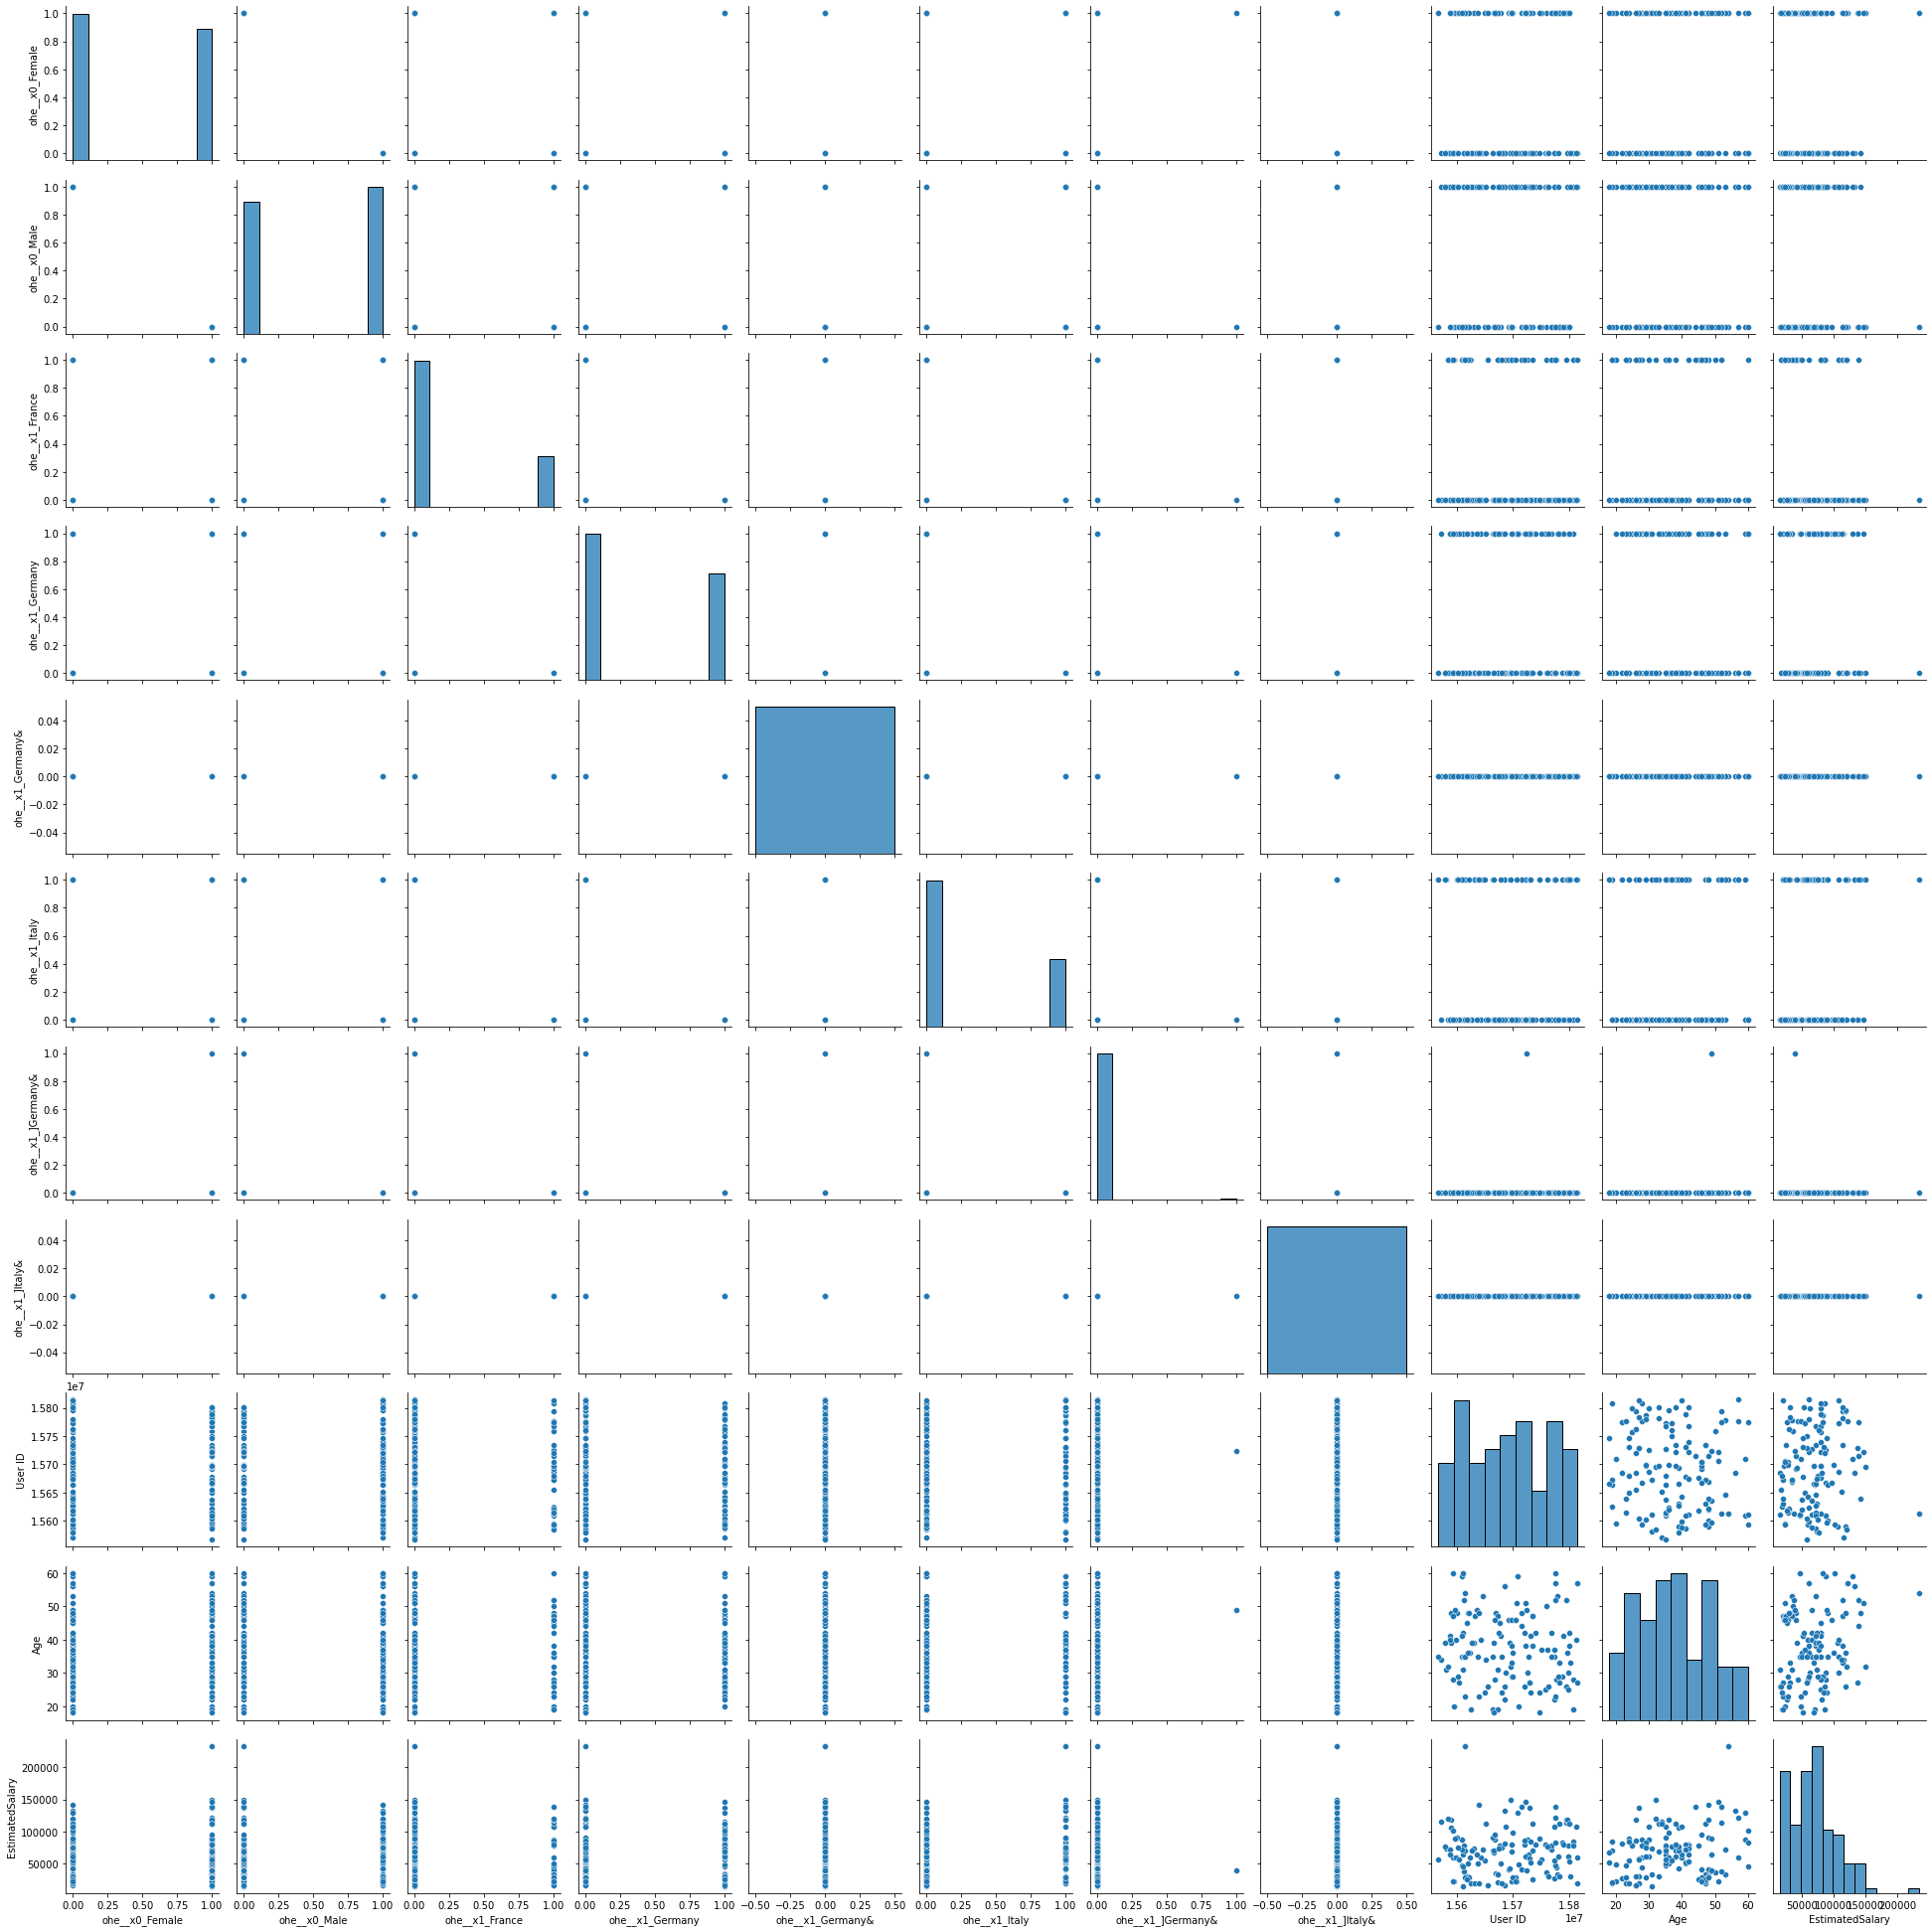

In [47]:
sns.pairplot(x_test)

In [57]:
y_train

253    0
379    0
119    0
196    0
219    0
      ..
71     0
106    0
270    1
348    0
102    0
Name: Purchased, Length: 270, dtype: object

# Building The ML Model

In [48]:
#Import The Ml Model
from sklearn.linear_model import LogisticRegression

In [59]:
#Create a instance or object of the model
y_train

253    0
379    0
119    0
196    0
219    0
      ..
71     0
106    0
270    1
348    0
102    0
Name: Purchased, Length: 270, dtype: object

In [51]:
logistic_model = LogisticRegression()

In [55]:
logistic_model.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Prediction

In [ ]:
x_test

In [ ]:
lor_model.prediction(x_test)

# Evaluation

In [ ]:
from sklearn.matrics import accuracy_score

# Real Time Prediction

In [ ]:
new_point = x_test.iloc[20:21,:]

In [ ]:
new_point

In [ ]:
new_point = sc.transform(new_point)

In [ ]:
lor_model.pre

# Save The Model

In [ ]:
import joblib

In [ ]:
#object --model
#filename
